In [1]:
import os ; os.chdir(r"D:\Projects\face_generator")
from stylegan import *
from deepface import DeepFace

In [2]:
local_file_path = r"models\stylegan3-r-ffhq-1024x1024.pkl"
device = torch.device('cuda')

with open(local_file_path, "rb") as f:
    gan_model = legacy.load_network_pkl(f)['G_ema'].to(device)

Seed 116
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


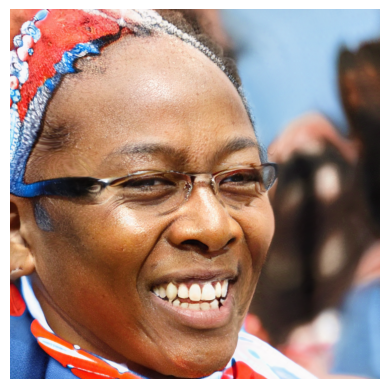

Seed 117


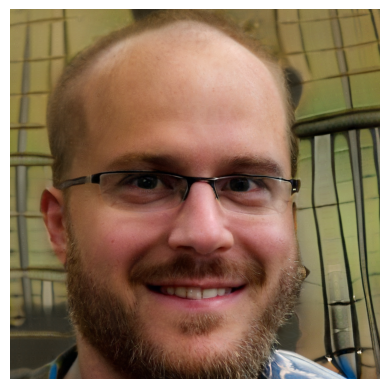

In [3]:
SEED_FROM = 116
SEED_TO = 118

# Generate the images for the seeds.
for seed in range(SEED_FROM, SEED_TO):
  print(f"Seed {seed}")
  vec = seed2vec(gan_model, seed)
  img = generate_image(gan_model, vec, device)
  display_image(img)

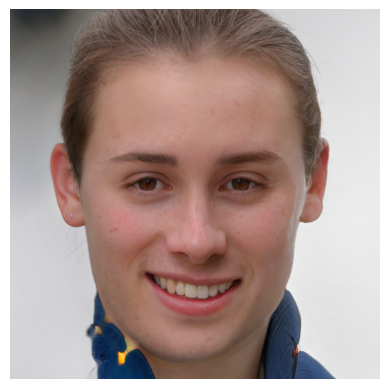

In [4]:
vec_or_seed = 587413
truncation_psi = 1
noise_range = 0.7

img = generate_image(gan_model, vec_or_seed, device, truncation_psi=truncation_psi, noise_range=noise_range)
display_image(img)

Our variables are now:
Integer seed (which is equivaent to a latent vector)

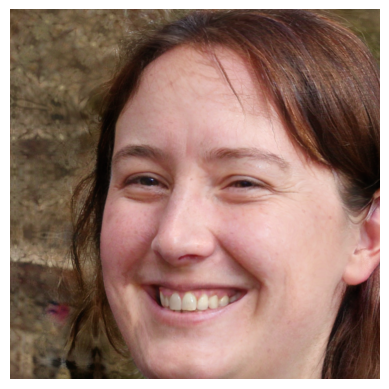

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.39it/s]

31 Woman white


In [7]:
vec_or_seed = 79878
truncation_psi = 0.8
noise_range = 0.7

img = generate_image(gan_model, vec_or_seed, device, truncation_psi=truncation_psi, noise_range=noise_range)
display_image(img)



predictions = DeepFace.analyze(img_path=np.array(img), actions=['age', 'gender', 'race'])
print(predictions[0]['age'], predictions[0]['dominant_gender'], predictions[0]['dominant_race'])

Morphing

In [7]:
SEEDS = [1000, 1003, 1001] # Better for fish
SEEDS = [0, 1, 2] # Better for fish
STEPS = 50

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(gan_model, SEEDS[i])
  v2 = seed2vec(gan_model, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in range(STEPS):
    current = current + step
    img = generate_image(gan_model, current, device)
    img.save(f'./results/frame-{idx}.png')
    idx+=1